To query the hvacnew3
data

In [1]:
from riak import RiakClient, RiakNode

/home/stephen/ESL/local/lib/python2.7/site-packages/riak/security.py:45: UserWarning: OpenSSL 1.0.1f 6 Jan 2014 (>= 1.0.1g required), TLS 1.2 support: False
  warnings.warn(msg, UserWarning)


In [2]:
myClient = RiakClient(pb_port=8087, protocol='pbc')

In [3]:
myClient.ping()

True

In [4]:
td=myClient.ts_describe('hvacnew3')
for r in td.rows:
    print r

['family', 'varchar', False, 1L, 1L]
['series', 'varchar', False, 2L, 2L]
['readingtime', 'timestamp', False, 3L, 3L]
['buildingid', 'sint64', False, None, None]
['systemid', 'sint64', False, None, None]
['systemage', 'sint64', False, None, None]
['targettemp', 'sint64', False, None, None]
['actualtemp', 'sint64', False, None, None]


In [5]:
#18 days worth
qs="""
    select * from hvacnew3 WHERE  readingtime > 1370044800000 and readingtime < 1371600001000
     and family = 'Family' 
    and series= 'Series'
"""
ds=myClient.ts_query('hvacnew3',qs)
print ds
for r in range(0,20):
    print ds.rows[r]

['Family', 'Series', datetime.datetime(2013, 6, 1, 0, 0, 1), 12L, 18L, 8L, 69L, 58L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 0, 33, 7), 5L, 5L, 19L, 65L, 69L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 0, 43, 51), 8L, 10L, 19L, 70L, 72L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 0, 45, 56), 16L, 18L, 20L, 70L, 66L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 1, 13, 19), 8L, 14L, 26L, 65L, 58L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 1, 13, 20), 16L, 12L, 4L, 66L, 67L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 1, 45, 56), 6L, 5L, 5L, 70L, 60L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 2, 0, 1), 5L, 12L, 21L, 65L, 60L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 2, 43, 51), 5L, 12L, 25L, 68L, 68L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 2, 45, 56), 7L, 5L, 24L, 70L, 78L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 3, 13, 19), 14L, 3L, 7L, 70L, 71L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 3

In [6]:
#60 days worth
qs="""
    select * from hvacnew3 WHERE  readingtime > 1370044800000 and readingtime < 1377993540000
    and family='Family'
    and series='Series'
    and buildingid = 2 
    and systemid <20
"""
ds1=myClient.ts_query('hvacnew3',qs)
print ds1
#print column headings
for c in ds1.columns:
    print c
#print ds.rows
for r in ds1.rows:
    print r

('family', 0)
('series', 0)
('readingtime', 3)
('buildingid', 1)
('systemid', 1)
('systemage', 1)
('targettemp', 1)
('actualtemp', 1)
['Family', 'Series', datetime.datetime(2013, 6, 1, 3, 33, 7), 2L, 13L, 19L, 68L, 76L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 6, 13, 20), 2L, 11L, 12L, 69L, 63L]
['Family', 'Series', datetime.datetime(2013, 6, 1, 9, 45, 56), 2L, 5L, 10L, 67L, 80L]
['Family', 'Series', datetime.datetime(2013, 6, 2, 2, 45, 56), 2L, 13L, 25L, 69L, 67L]
['Family', 'Series', datetime.datetime(2013, 6, 2, 5, 13, 20), 2L, 14L, 12L, 68L, 70L]
['Family', 'Series', datetime.datetime(2013, 6, 2, 17, 33, 7), 2L, 12L, 26L, 65L, 78L]
['Family', 'Series', datetime.datetime(2013, 6, 3, 6, 0, 1), 2L, 18L, 20L, 68L, 59L]
['Family', 'Series', datetime.datetime(2013, 6, 4, 3, 0, 1), 2L, 11L, 10L, 69L, 69L]
['Family', 'Series', datetime.datetime(2013, 6, 4, 3, 43, 51), 2L, 15L, 15L, 66L, 72L]
['Family', 'Series', datetime.datetime(2013, 6, 4, 5, 0, 1), 2L, 18L, 1L, 67L, 63L]
['Fam

System Age appears to be very anomalous, it looks like junk.

### Aggregate functions examples

In [7]:
qs="""
    select COUNT(*) from hvacnew3 WHERE  readingtime > 1370044800000 and readingtime < 1377993540000
    and family='Family'
    and series='Series'
    and buildingid = 2 
    and systemid <20
"""
ds=myClient.ts_query('hvacnew3',qs)
print ds.rows

[[116L]]


In [8]:
qs="""
    select MIN(actualtemp) from hvacnew3 WHERE  readingtime > 1370044800000 and readingtime < 1377993540000
    and family='Family'
    and series='Series'
    and buildingid = 2 
    and systemid <20
"""
ds=myClient.ts_query('hvacnew3',qs)
print ds.rows

[[55L]]


In [9]:
qs="""
    select MAX(actualtemp) from hvacnew3 WHERE  readingtime > 1370044800000 and readingtime < 1377993540000
    and family='Family'
    and series='Series'
    and buildingid = 2 
    and systemid <20
"""
ds=myClient.ts_query('hvacnew3',qs)
print ds.rows

[[80L]]


### The Pythonic Way

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [11]:
df=pd.DataFrame(ds1.rows)

In [12]:
df.describe()

,3,4,5,6,7
count,116,116.000000,116.000000,116.000000,116.000000
mean,2,10.051724,15.336207,67.732759,68.827586
std,0,5.489666,8.418348,1.751311,7.735043
min,2,1.000000,1.000000,65.000000,55.000000
25%,2,6.000000,9.000000,66.000000,63.000000
50%,2,10.000000,15.000000,68.000000,69.000000
75%,2,15.000000,21.250000,69.000000,76.000000
max,2,19.000000,30.000000,70.000000,80.000000


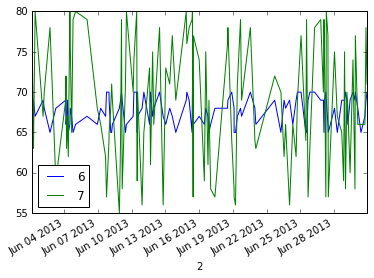

In [13]:
df.plot(x=2,y=[6,7],kind='line')